In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('metals_and_alloys_dataset.csv')


df['class'] = df['class'].replace(
    {'low': '0', 
     'medium': '1', 
     'high': '2'})

In [3]:
train = df[df['test or train'] == 'train']
test = df[df['test or train'] == 'test']

In [4]:
proxies = ['uts_median', 'yield_median', 'comp_median', 'frac_median', 'hard_median', 'dens_median','bulk_median', 'shear_median', 'young_median']
X = df[proxies]
y = df['class']

X_train = train[proxies]
X_test = test[proxies]
y_train = train['class']
y_test = test['class']


In [5]:
clf = RandomForestClassifier(bootstrap=False,
                   max_depth=2,
                   max_features='sqrt',
                   max_leaf_nodes= 5,
                   min_samples_leaf= 3,
                   min_samples_split= 5,
                   n_estimators=1000,
                   n_jobs=-1,
                   random_state= 5)
final = clf.fit(X_train, y_train);

In [6]:
y_pred = final.predict(X_test)
y_pred_train = final.predict(X_train)

In [7]:
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

Train Accuracy: 0.723
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.70      0.67      0.68        21
           2       0.68      0.91      0.78        23

    accuracy                           0.72        65
   macro avg       0.74      0.72      0.72        65
weighted avg       0.74      0.72      0.72        65

[[12  4  5]
 [ 2 14  5]
 [ 0  2 21]]


In [8]:
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.625
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.62         8
   macro avg       0.72      0.61      0.63         8
weighted avg       0.69      0.62      0.63         8

[[1 1 0]
 [0 2 1]
 [0 1 2]]


In [9]:
## PRODUCTION MODEL

model = final.fit(X, y)
y_rf = model.predict(X)


In [10]:
print("Test Accuracy: {:.3f}".format(accuracy_score(y, y_rf)))
print(classification_report(y, y_rf))
print(confusion_matrix(y, y_rf))

Test Accuracy: 0.726
              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.71      0.71      0.71        24
           2       0.68      0.88      0.77        26

    accuracy                           0.73        73
   macro avg       0.75      0.72      0.72        73
weighted avg       0.75      0.73      0.72        73

[[13  4  6]
 [ 2 17  5]
 [ 0  3 23]]


In [11]:
## SHAP analysis
explainer = shap.TreeExplainer(final)

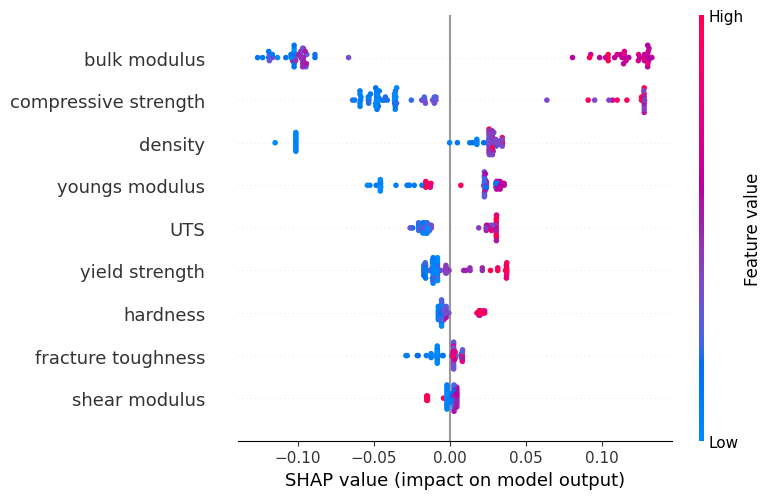

In [12]:
shap_values = explainer.shap_values(X)

names = ['UTS', 'yield strength', 'compressive strength', 'fracture toughness', 'hardness', 'density','bulk modulus', 'shear modulus', 'youngs modulus']

fig = shap.summary_plot(shap_values[2], X, feature_names=names)
plt.rc("font", family="Arial narrow")

In [13]:
## VALIDATION
df_valid = pd.read_csv('alloys_for_validation.csv')

df_valid['class'] = df_valid['class'].replace(
    {'low': '0', 
     'medium': '1', 
     'high': '2'})

X_valid = df_valid[proxies]
y_valid = df_valid['class']



df_valid

,name,class,spall_median,uts_median,yield_median,comp_median,bulk_median,shear_median,young_median,dens_median,hard_median,frac_median
0,93W,2,2.585,1241.0,920.0,1450,285,143,368,17.610,295,41.0
1,HfZrTiTa,2,3.240,1110.0,774.0,1300,110,25,70,9.358,372,62.0
2,Ti_5553,2,3.720,768.6,768.1,1138,82,43,109,4.638,413,33.9


In [14]:
y_rf_valid = model.predict(X_valid)


In [15]:
print('Material: ' + df_valid['name'].iloc[0] + ', experimental (GPa) = ' + df_valid['class'].iloc[0] + 
      ', prediction (GPa) = ' + y_rf_valid[0])

print('Material: ' + df_valid['name'].iloc[1] + ', experimental (GPa) = ' + df_valid['class'].iloc[1] + 
      ', prediction (GPa) = ' + y_rf_valid[1])

print('Material: ' + df_valid['name'].iloc[2] + ', experimental (GPa) = ' + df_valid['class'].iloc[2] + 
      ', prediction (GPa) = ' + y_rf_valid[2])

Material: 93W, experimental (GPa) = 2, prediction (GPa) = 2
Material: HfZrTiTa, experimental (GPa) = 2, prediction (GPa) = 2
Material: Ti_5553, experimental (GPa) = 2, prediction (GPa) = 1
